## Final Project Submission

Please fill out:
* Student name: Ronny Kabiru
* Student pace: Full time hybrid
* Scheduled project review date/time: 04.00pm March 22, 2024
* Instructor name: Maryann Mwikali
* Blog post URL: N/A


## Microsoft's New Movie Studio

PROJECT OVERVIEW

This project was initiated by Microsoft Studio, which is a new movie production studio. They requested us to conduct a research, using other databases from other experienced movie production companies such as Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB and The Number, with the aim of guiding them on producing good movies which will succeed in the future. The fact that this is a new movie studio, they don’t have any knowledge on producing good movies that will succeed in future. So we’ll have to use the imported data, from other production studios, with the aim of determining the movies that they will use to produce other good movies. 

The main objective of this project is to analyze the current trends in the film industry by determining what types of films or movies that are currently succeeding at the box office. The findings will be used to give insights in making judgements regarding the type of movies that the Microsoft Company, which is a new studio, will produce.
Project goals include the following: -

   1. To investigate the current movie trends, in accordance to the Box Office Productions
   
   2. To examine the necessary statistics that will be used to determine the movies that are succeeding at the Box Office.
   
   3. To translate the findings into actionable insights that will be used by Microsoft Studio to make informed decisions to produce good movies.
   
   4. To provide recommendations on the types of films that are likely to be successful in the future.  
   

BUSINESS UNDERSTANDING

Microsoft Studio has made a decision to launch a new movie studio and enter into the film business industry. They don't have the skills or the expertise to make successful movies that will help them to earn more profits like other production companies at the Box Office. They must comprehend the current trends and tastes of movies, that will be liked by their targeted consumers, in order to make wise selections regarding the kinds of movies to produce. 

This project's goal and objective is to investigate the kinds of movies that are currently doing well at the Box Office and offer useful information that Microsoft can use to decide what kinds of movies to make. 
In order to determine the most popular genres, actors, directors, and other elements that influence a film's industry success, the project will involve evaluating movie data. 

DATA UNDERSTANDING

Data Sources

In this project, we used data from other movie and film production companies, such as Box Office Mojo, IMDB, Rotten Tomatoes and The MovieDB. These data samples were imported into our databases of which we used them to determine the current movies and the genres that are currently doing well in the market. The data contains movie title, the studio production, domestic gross, foreign gross, the year that they were produced and the number of votes and reviews that were reviewed by their targeted consumers after watching them. 

Data Quality

During the importation of our data into our database, issues like  missing data, duplicates were encountered. First, I had to clean the data by removing duplicates and taking care of missing data and this helped me to improve the quality of the data from our sources. 

BUSINESS RECOMMENDATIONS

- I would like to recommend Microsoft to produce the movies like The Monkey King 3[2018] since it has earned the other production companies with over $114 million of which this will earn, the new Microsoft studio, more profits as compared to other movies.
 
- I would like to recommend Microsoft studio to produce more of Drama and Action movies and series since they have been performing well over the years and this will attract more audience from all over the world.

- I would also like to recommend Microsoft studio to produce other movies like Kid with a bike, Desiert, Once Upon A time in Anatolia and BarberShop: The Next Cut since they are likely to do well in the future after having a lot of experiences over the years like other movie production companies. 

## Data Cleaning bom.movie_gross

Importing Packages and Understanding The Data.

In [3]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [4]:
#read csv file
df = pd.read_csv('datasets/bom.movie_gross.csv', index_col=0)
df

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/bom.movie_gross.csv'

In [ ]:
df.shape

(3387, 4)

In [ ]:
df.tail()

,studio,domestic_gross,foreign_gross,year
title,,,,
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018
The Swan,Synergetic,2400.0,NaN,2018
An Actor Prepares,Grav.,1700.0,NaN,2018


In [ ]:
#preview column names
def df_column(df):
    cols = list(df.columns)

    return cols


df_column(df)


['studio', 'domestic_gross', 'foreign_gross', 'year']

Grouping Data.

In [ ]:
df.groupby('domestic_gross')['year'].mean().head()

domestic_gross
100.0    2013.000000
300.0    2015.666667
400.0    2014.500000
500.0    2017.000000
600.0    2012.000000
Name: year, dtype: float64

Checking for Duplicates.

In [ ]:
df.duplicated().value_counts()

False    3376
True       11
dtype: int64

In [ ]:
#check NaNs
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [ ]:
df.isna()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,False,False,False,False
Alice in Wonderland (2010),False,False,False,False
Harry Potter and the Deathly Hallows Part 1,False,False,False,False
Inception,False,False,False,False
Shrek Forever After,False,False,False,False
...,...,...,...,...
The Quake,False,False,True,False
Edward II (2018 re-release),False,False,True,False
El Pacto,False,False,True,False


In [ ]:
df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

studio 
 IFC      0.049083
Uni.     0.043465
WB       0.041396
Fox      0.040213
Magn.    0.040213
Name: studio, dtype: float64 


domestic_gross 
 1100000.0    0.009527
1000000.0    0.008931
1300000.0    0.008931
1200000.0    0.007443
1400000.0    0.006847
Name: domestic_gross, dtype: float64 


foreign_gross 
 1200000    0.011291
1100000    0.006873
1900000    0.005891
4200000    0.005891
2500000    0.005400
Name: foreign_gross, dtype: float64 


year 
 2015    0.132861
2016    0.128727
2012    0.118099
2011    0.117803
2014    0.116622
Name: year, dtype: float64 




Missing Data.

In [ ]:
df['studio'].value_counts()

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
        ... 
CLF        1
ParC       1
EF         1
3D         1
RME        1
Name: studio, Length: 257, dtype: int64

In [ ]:
df['studio'].fillna(value='IFC', inplace=True)

In [ ]:
#Recheck for missing values in studio column
df.isna().sum()

studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
#replace mean values in domestic_gross column
df['domestic_gross'].fillna(df['domestic_gross'].median(), inplace=True)

In [ ]:
df.isna().sum()

studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
#drop the missing values foreign_gross
df.dropna(inplace=True)

In [ ]:
#recheck for missing values
df.isna().sum()

studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [ ]:
df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
I Still See You,LGF,1400.0,1500000,2018
The Catcher Was a Spy,IFC,725000.0,229000,2018
Time Freak,Grindstone,10000.0,256000,2018


## Data Visualization.

Current(2018) movie trends that are profitable in the market-internationally.

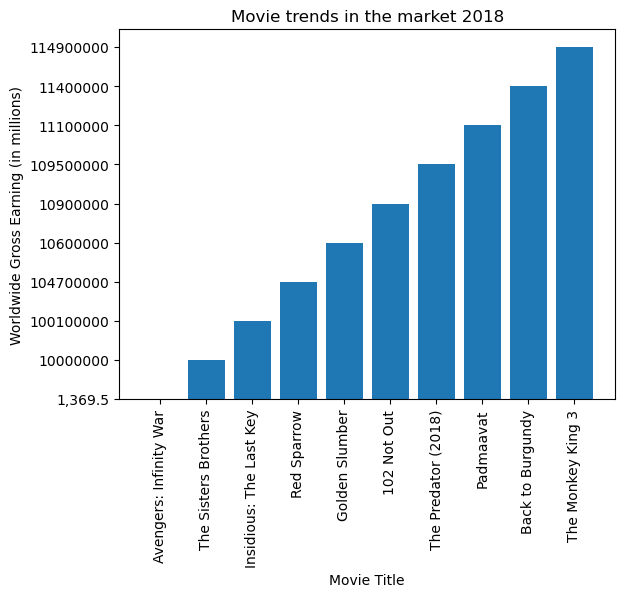

In [ ]:
df = pd.read_csv('datasets/bom.movie_gross.csv')

#filter to relevant year 2018
movies_2018 = df[df['year'] == 2018]

#Sort the movies by international gross earnings
movies_2018_sorted = movies_2018.sort_values('foreign_gross', ascending=True)

#Focus on top 10 movies
top_10_movies_2018 = movies_2018_sorted.head(10)

#Bar graph of top 10 movies
plt.bar(top_10_movies_2018['title'], top_10_movies_2018['foreign_gross'])

#Title and labels
plt.title('Movie trends in the market 2018')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Earning (in millions)')
plt.xticks(rotation=90)

plt.show()

Successful movies in the domestic market.

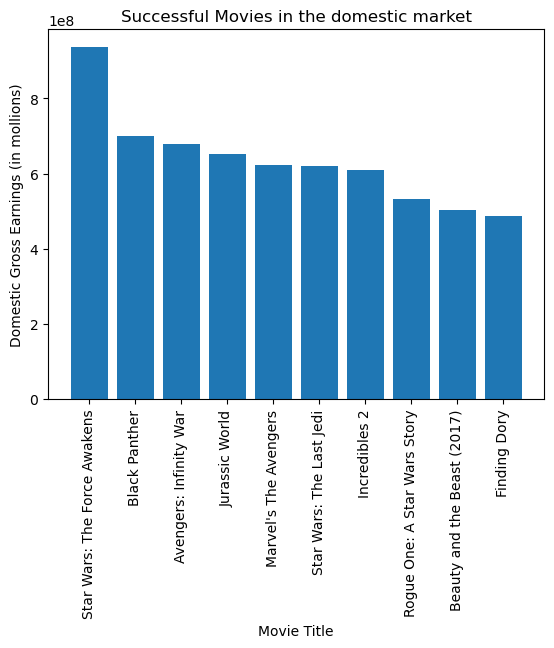

In [ ]:
#Filter data
movies_domestic = df[df['domestic_gross'].notnull()]

#Sort movies
movies_domestic_sorted = movies_domestic.sort_values('domestic_gross', ascending=False)

#Select top 10
top_10_movies_domestic = movies_domestic_sorted.head(10)

#Create bar graph
plt.bar(top_10_movies_domestic['title'], top_10_movies_domestic['domestic_gross'])

#Set title and axis labels
plt.title('Successful Movies in the domestic market')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross Earnings (in mollions)')
plt.xticks(rotation=90)

plt.show()


Type of films that are likely to be successful in the future.

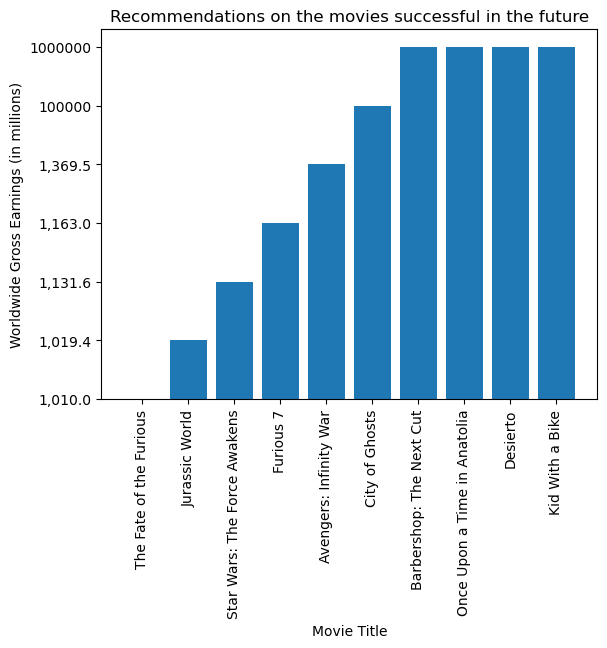

In [ ]:
movies_sorted = df.sort_values('foreign_gross', ascending=True)

#Top 10 movies
top_10_movies = movies_sorted.head(10)

#Create a bar graph of the top 10 movies
plt.bar(top_10_movies['title'], top_10_movies['foreign_gross'])
plt.title('Recommendations on the movies successful in the future')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Earnings (in millions)')
plt.xticks(rotation=90)
plt.show()

## Data Cleaning im.db Data.

Import packages and connect to sqlite3.

In [ ]:
conn = sqlite3.connect("datasets\im.db")

In [ ]:
pd.read_sql("""SELECT name FROM sqlite_master
    WHERE type = 'table';
    """, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Convert Tables to DataFrames.

In [ ]:
pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [ ]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Join The Two Tables.

In [ ]:
df = pd.read_sql("""SELECT * FROM movie_ratings
    JOIN movie_basics
    USING (movie_id);""", conn)
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [ ]:
df.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [ ]:
df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73849,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [ ]:
duplicates = df[df.duplicated()]
duplicates

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres


## Data Visualization.

Current movie trends in the market by genres.

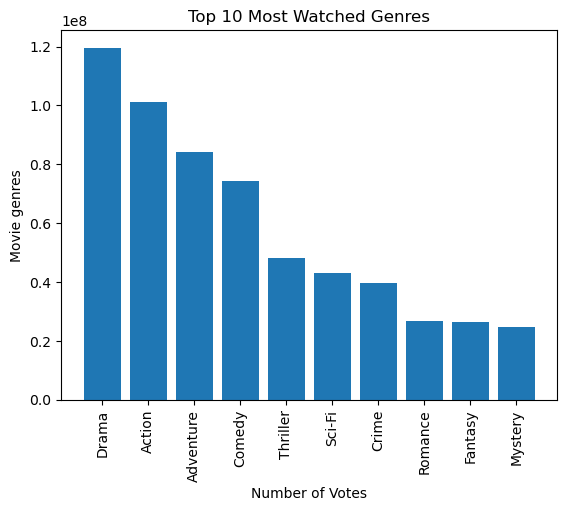

In [ ]:
#Load dataset
df = pd.read_sql("""SELECT * FROM movie_ratings
    JOIN movie_basics
    USING (movie_id);""", conn)
df

#Split genres into separate values
df['genres'] = df['genres'].str.split(',')

#Create one row per genre per movie
df = df.explode('genres')

#Group by genre and find sum of votes
genre_votes = df.groupby('genres')['numvotes'].sum()

#Sort by number of votes and take the top 10
top_genres = genre_votes.sort_values(ascending=False)[:10]

#Plot a bar chart
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Number of Votes')
plt.ylabel('Movie genres')
plt.title('Top 10 Most Watched Genres')
plt.xticks(rotation=90)
plt.show()

Determining the movies that are doing well in the market.

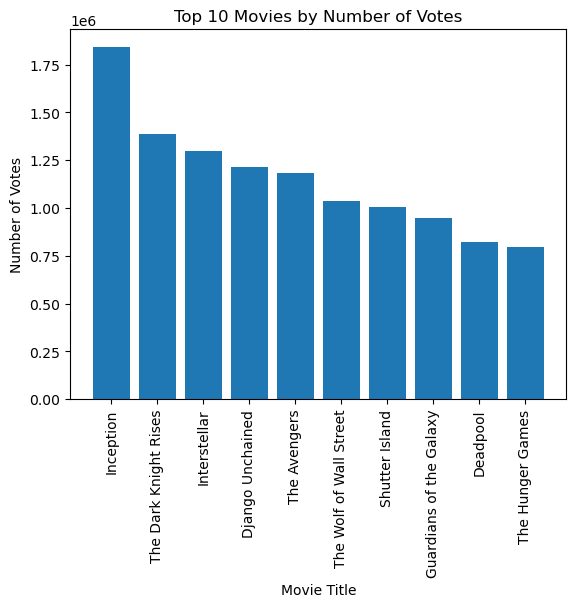

In [ ]:
#Load data
df = pd.read_sql("""SELECT * FROM movie_ratings
    JOIN movie_basics
    USING (movie_id);""", conn)
df

#Sort the movies by number of votes in descending order
df = df.sort_values('numvotes', ascending=False)

#Select the top 10 movies
top_10 = df.head(10)

#Create a bar graph of the top 10 movies
plt.bar(top_10['primary_title'], top_10['numvotes'])
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')
plt.title('Top 10 Movies by Number of Votes')
plt.show()